In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Defining square trick for moving a line closer to a point
def square_trick(m, b, r, p, alpha):
    """ This function returns the slope and intercept of a line closer to the point (r, p)
    
    Args:
        m (float): Slope of the line 
        b (float): y-intercept of the line
        r (float): Feature in dataset
        p (float): Label in dataset
        alpha (+ve float): Learning rate
    
    Returns:
        tupple: Improved slope m1 and improved y-intercept b1
    """
    
    p_hat = (r*m) + b
    
    return (m + (alpha*r*(p-p_hat)), b + (alpha*(p-p_hat)))
    
    # Observation below doesn't happen here when point (r, p) is on the line. p-p_hat becomes zero so we don't 
    # move the line.

In [3]:
# Defining the absolute trick for moving line closer to a point
def abs_trick(m, b, r, p, alpha):
    """This function returns the slope and intercept of a line closer to the point (r, p)
    
    Args:
        m (float): Slope of the line 
        b (float): y-intercept of the line
        r (float): Feature in dataset
        p (float): Label in dataset
        alpha (+ve float): Learning rate
    
    Returns:
        tupple: Improved slope m1 and improved y-intercept b1
    """
    
    p_hat = (r*m) + b
    
    if p > p_hat:
        return (m + (alpha*r), b + alpha)
    elif p < p_hat:
        return (m - (alpha*r), b - alpha)
        # One thing to note here is that if the point (r, p) is actually on the line, then we are essentially 
        # going to be moving the line away from the point and not closer
    else:
        return (m, b)
        # Now seems all is settled    

In [4]:
# Defining the linear regression algorithm
def linear_reg_1(r_values, p_values, alpha=0.01, epochs=1000):
    """This function returns the slope and intercept of a line that fit the data points provided
    
    Args:
        r_values(list): List of features in our dataset. Length = N
        p_values(list): List of labels in our dataset. Length = N
        alpha(float): Learning rate of our algorithm
        epochs(int): Number of iteration of our algorithm
        
    Returns:
        tupple: Slope m and y-intercept b or our model
    """
    
    # Pick random slope and intercept to begin with
    m = random.random()
    b = random.random()
    
    #Length of lists
    N = len(r_values)
    
    for _ in range(epochs):
        index = random.randint(0, N-1)
        r = r_values[index]
        p = p_values[index]
        
        m,b = square_trick(m, b, r, p, alpha)
    
    return (m, b)

In [5]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356, 407, 448])

In [6]:
m, b = linear_reg_1(features, labels, alpha=0.01, epochs=10000)

In [7]:
m, b

(50.28104949924813, 100.3807347805447)

In [8]:
labels_hat = [(r*m)+b for r in features]

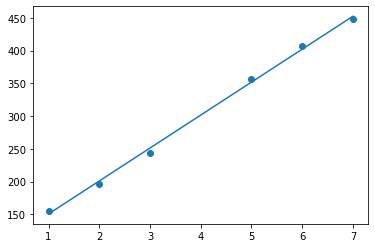

In [9]:
plt.scatter(features, labels)
plt.plot(features, labels_hat);